In [11]:
import sys

import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)

In [12]:

import pandas as pd


project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'RADCURE_challenge_clinical.csv')
df = pd.read_csv(data_file_path)

In [13]:
from jarvais.analyzer import Analyzer
from pprint import pprint

df.drop(columns=["Study ID", "split", "survival_time", "death"], inplace=True)

config = Analyzer.dry_run(df)

pprint(config)

Config file not found. Creating custom...
Used a heuristic to define categorical and continuous columns. Please review!


Feature Types:
  - Categorical: ['N Stage', 'T Stage', 'Sex', 'Stage', 'Disease Site', 'Dose', 'EGFRI', 'HPV Combined', 'Chemotherapy']
  - Continuous: ['age at dx']


Outlier Analysis:
  - Outliers found in N Stage: ['N3a: 14 out of 2552', 'NX: 1 out of 2552']
  - Outliers found in T Stage: ['T2 (2): 1 out of 2552', 'TX: 1 out of 2552', 'T3 (2): 1 out of 2552']
  - No Outliers found in Sex
  - Outliers found in Stage: ['IV: 6 out of 2549', 'IIIC: 2 out of 2549', 'IIIA: 2 out of 2549', 'IIA: 1 out of 2549']
  - Outliers found in Disease Site: ['esophagus: 22 out of 2552', 'salivary glands: 4 out of 2552']
  - Outliers found in Dose: ['50.0: 9 out of 2552', '69.96: 2 out of 2552', '50.8: 1 out of 2552', '55.0: 1 out of 2552', '53.55: 1 out of 2552', '59.4: 1 out of 2552']
  - No Outliers found in EGFRI
  - No Outliers found in HPV Combined
  - No Outliers found in Ch

In [14]:
import yaml
from pathlib import Path

config['columns']['categorical'].remove('Dose')
config['columns']['continuous'].append('Dose') 

pprint(config)

analyzer_path = Path('outputs/analyzer')
analyzer_path.mkdir(parents=True, exist_ok=True)

with open(analyzer_path / 'config.yaml', 'w') as f:
            yaml.dump(config, f)

{'columns': {'categorical': ['N Stage',
                             'T Stage',
                             'Sex',
                             'Stage',
                             'Disease Site',
                             'EGFRI',
                             'HPV Combined',
                             'Chemotherapy'],
             'continuous': ['age at dx', 'Dose'],
             'date': [],
             'other': []},
 'mapping': {'Chemotherapy': {'0': '0', '1': '1'},
             'Disease Site': {'esophagus': 'Other',
                              'hypopharynx': 'hypopharynx',
                              'larynx': 'larynx',
                              'lip & oral cavity': 'lip & oral cavity',
                              'nasal cavity': 'nasal cavity',
                              'nasopharynx': 'nasopharynx',
                              'oropharynx': 'oropharynx',
                              'paranasal sinus': 'paranasal sinus',
                              'saliva

In [15]:
from jarvais.analyzer import Analyzer

analyzer = Analyzer(df, target_variable='Chemotherapy', output_dir='./outputs/analyzer', config='outputs/analyzer/config.yaml')

analyzer.run()

Feature Types:
  - Categorical: ['N Stage', 'T Stage', 'Sex', 'Stage', 'Disease Site', 'EGFRI', 'HPV Combined', 'Chemotherapy']
  - Continuous: ['age at dx', 'Dose']


Outlier Analysis:
  - Outliers found in N Stage: ['N3a: 14 out of 2552', 'NX: 1 out of 2552']
  - Outliers found in T Stage: ['T2 (2): 1 out of 2552', 'TX: 1 out of 2552', 'T3 (2): 1 out of 2552']
  - No Outliers found in Sex
  - Outliers found in Stage: ['IV: 6 out of 2549', 'IIIC: 2 out of 2549', 'IIIA: 2 out of 2549', 'IIA: 1 out of 2549']
  - Outliers found in Disease Site: ['esophagus: 22 out of 2552', 'salivary glands: 4 out of 2552']
  - No Outliers found in EGFRI
  - No Outliers found in HPV Combined
  - No Outliers found in Chemotherapy

Applying changes from config...

╒══════════════════════╤═══════════════════╤═══════════╤═════════════╕
│                      │                   │ Missing   │ Overall     │
╞══════════════════════╪═══════════════════╪═══════════╪═════════════╡
│ n                    │         

In [16]:
from jarvais.trainer import TrainerSupervised

df = pd.read_csv('./outputs/analyzer/updated_data.csv', index_col=0)

trainer = TrainerSupervised(task='binary', output_dir='./outputs/trainer')
trainer.run(df, 'Chemotherapy')

Training fold 1/5...
Fold 1 score: 0.97099667293505
Training fold 2/5...
Fold 2 score: 0.9475378178307049
Training fold 3/5...
Fold 3 score: 0.9642795830778663
Training fold 4/5...
Fold 4 score: 0.9587982832618026
Training fold 5/5...
Fold 5 score: 0.9623400639744102

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
------------------------------------------------------------------------------------
╒═══════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│ model                 │ score_test               │ score_val                │ score_train              │
╞═══════════════════════╪══════════════════════════╪══════════════════════════╪══════════════════════════╡
│ WeightedEnsemble_L2   │ AUROC 0.94 [0.93, 0.94]  │ AUROC 0.96 [0.95, 0.97]  │ AUROC 0.98 [0.97, 0.99]  │
│                       │ F1: 0.85 [0.84, 0.86]    │ F1: 0.89 [0.88, 0.91]    │ F1: 0.92 [0.9, 0.94]     │
│                       │

In [17]:
trainer.X_test

,age at dx,Sex,T Stage,N Stage,Stage,Dose,EGFRI,HPV Combined,Disease Site
430,89.6,Male,T1b,N0,I,51.0,0,Unknown,larynx
488,43.6,Male,T4a,N0,IVA,70.0,0,1.0,oropharynx
1643,52.3,Male,T1,N2a,IVA,70.0,0,1.0,oropharynx
1059,54.1,Male,T3,N2b,IVA,70.0,0,Unknown,lip & oral cavity
1184,55.3,Male,T2,N1,III,70.0,0,1.0,oropharynx
...,...,...,...,...,...,...,...,...,...
2408,51.1,Female,T1,N0,I,70.0,0,Unknown,nasopharynx
55,55.4,Male,T1,N0,I,60.0,0,Unknown,larynx
1651,38.5,Male,T1b,N0,I,70.0,0,Unknown,larynx
2308,76.2,Male,T1b,N0,I,66.0,0,0.0,larynx


Possible Bias in N Stage:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.150
Date:                Wed, 29 Jan 2025   Prob (F-statistic):            0.00173
Time:                        13:57:17   Log-Likelihood:                -447.67
No. Observations:                 511   AIC:                             913.3
Df Residuals:                     502   BIC:                             951.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0

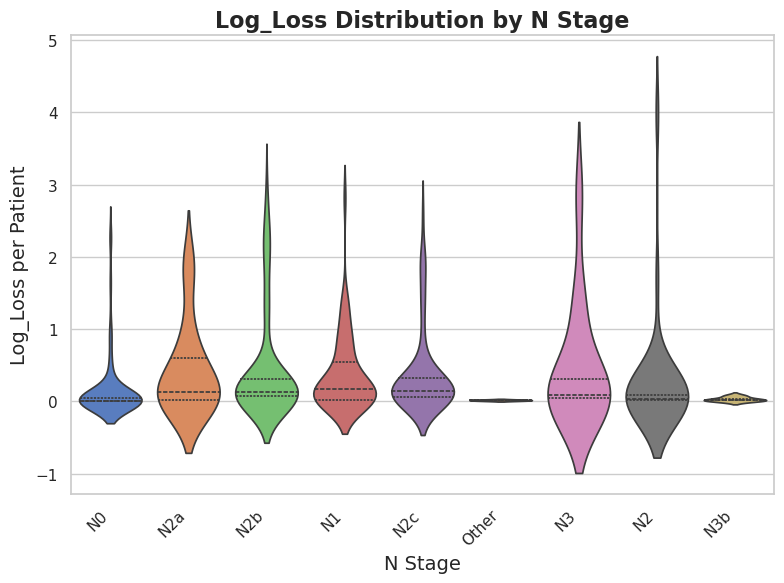

Subgroup Analysis(N Stage)
╒══════════════════════════════╤══════════════════════╤═════════════════════╤════════════════════╤════════════════════╕
│                              │ N0                   │ N1                  │ N2                 │ N2a                │
╞══════════════════════════════╪══════════════════════╪═════════════════════╪════════════════════╪════════════════════╡
│ mean_prediction              │ 0.1092896174863388   │ 0.45901639344262296 │ 0.9333333333333333 │ 0.4375             │
├──────────────────────────────┼──────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ false_positive_rate          │ 0.031446540880503145 │ 0.21212121212121213 │ 0.5                │ 0.2222222222222222 │
├──────────────────────────────┼──────────────────────┼─────────────────────┼────────────────────┼────────────────────┤
│ Relative mean_prediction     │ 1.000 ✅             │ 4.200 ✅            │ 8.540 ✅           │ 4.003 ✅           │
├────────────────

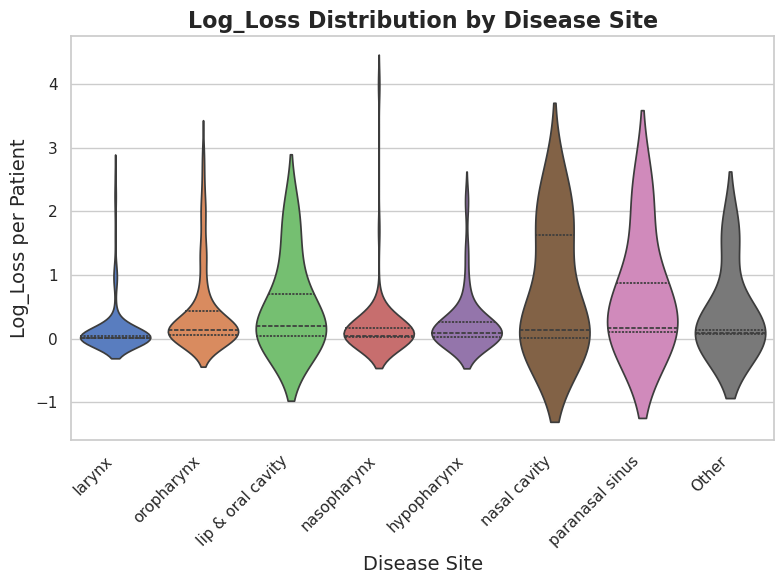

Subgroup Analysis(Disease Site)
╒══════════════════════════════╤══════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│                              │ Other    │ hypopharynx         │ larynx              │ lip & oral cavity   │
╞══════════════════════════════╪══════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ mean_prediction              │ 0.4      │ 0.4                 │ 0.11392405063291139 │ 0.42857142857142855 │
├──────────────────────────────┼──────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ false_positive_rate          │ 0.25     │ 0.10526315789473684 │ 0.02962962962962963 │ 0.3333333333333333  │
├──────────────────────────────┼──────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Relative mean_prediction     │ 0.664 ✅ │ 0.664 ✅            │ 0.189 ✅            │ 0.711 ✅            │
├──────────────────────────────┼──────────┼─────────────────────┼─────────────────────┼─────

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:21<00:00,  1.23it/s]


In [18]:
from jarvais.explainer import Explainer

sensitive_features = {k: trainer.X_test[k] for k in ['N Stage', 'Disease Site', 'Sex']}

exp = Explainer.from_trainer(trainer, sensitive_features=sensitive_features)
exp.run()